In [1]:
!pip install --upgrade category_encoders

In [2]:
help('modules')


Please wait a moment while I gather a list of all available modules...



/home/diolinux/.pyenv/versions/3.6.6/lib/python3.6/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
/home/diolinux/.pyenv/versions/3.6.6/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/diolinux/.pyenv/versions/3.6.6/lib/python3.6/pkgutil.py:92: MatplotlibDeprecationWarning: 
The matplotlib.compat module was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  __import__(info.name)


IPython             base64              jsonschema          scipy
PIL                 bdb                 jupyter             seaborn
__future__          binascii            jupyter_client      secrets
_argon2_cffi_bindings binhex              jupyter_core        select
_ast                bisect              jupyter_server      selectors
_asyncio            bleach              jupyterlab          send2trash
_bisect             builtins            jupyterlab_pygments setuptools
_blake2             bz2                 jupyterlab_server   shelve
_bootlocale         cProfile            keyword             shlex
_bz2                calendar            kiwisolver          shutil
_cffi_backend       category_encoders   lib2to3             signal
_codecs             certifi             linecache           site
_codecs_cn          cffi                locale              six
_codecs_hk          cgi                 logging             sklearn
_codecs_iso2022     cgitb               lzma         

/home/diolinux/.pyenv/versions/3.6.6/lib/python3.6/pkgutil.py:107: VisibleDeprecationWarning: zmq.eventloop.minitornado is deprecated in pyzmq 14.0 and will be removed.
    Install tornado itself to use zmq with the tornado IOLoop.
    
  yield from walk_packages(path, info.name+'.', onerror)


In [3]:
!pip install statsmodels

In [4]:
!pip install git+git://github.com/scikit-learn/scikit-learn.git

  Cloning git://github.com/scikit-learn/scikit-learn.git to /tmp/pip-req-build-ev119fwf
  Running command git clone --filter=blob:none -q git://github.com/scikit-learn/scikit-learn.git /tmp/pip-req-build-ev119fwf
  fatal: unable to connect to github.com:
  github.com[0: 20.201.28.151]: errno=Connection refused

ERROR: Command errored out with exit status 128: git clone --filter=blob:none -q git://github.com/scikit-learn/scikit-learn.git /tmp/pip-req-build-ev119fwf Check the logs for full command output.


In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
!pip install category_encoders

In [7]:
!pip install -U scikit-learn==0.24.2

In [1]:
# Visualização e manipulação de dados
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from typing import List, Tuple
# Aumentando a visualização do pandas
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# Modelling libs
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split 

# Feature importance
from sklearn.inspection import permutation_importance

# Categorical encoders
from category_encoders.target_encoder import TargetEncoder

# Stats libs
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os

from matplotlib.dates import DateFormatter

sns.set(font_scale=1.2, style="whitegrid")

/home/diolinux/.pyenv/versions/3.6.6/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# Carregamento dos dados
df = pd.read_csv('2004-2021.tsv',sep='\t', encoding='utf-8')

In [3]:
# First Contact
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

In [4]:
# Dropando features que deram problemas de índices duplicados
df.drop(columns=['DATA INICIAL','DATA FINAL'], inplace=True)

In [5]:
# Sumário de dados faltantes
df.isnull().sum()

REGIÃO                           0
ESTADO                           0
PRODUTO                          0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PREÇO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PREÇO MÍNIMO REVENDA             0
PREÇO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PREÇO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PREÇO MÍNIMO DISTRIBUIÇÃO        0
PREÇO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
dtype: int64

In [6]:
df.shape

(120823, 16)

In [7]:
df['MARGEM MÉDIA REVENDA'].head(10)

0    0.463
1    0.399
2    0.419
3    0.432
4     0.24
5    0.426
6    0.353
7    0.515
8    0.353
9    0.277
Name: MARGEM MÉDIA REVENDA, dtype: object

In [8]:
df.head()

,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


## Alteração do tipo de dados de features numéricas para float64

In [9]:
df['PREÇO MÉDIO DISTRIBUIÇÃO'] = pd.to_numeric(df['PREÇO MÉDIO DISTRIBUIÇÃO'])

ValueError: Unable to parse string "-" at position 1903

In [10]:
print("Value of row 1903")
display(df.iloc[1903])

Value of row 1903


REGIÃO                                      NORTE
ESTADO                                       PARA
PRODUTO                          ETANOL HIDRATADO
NÚMERO DE POSTOS PESQUISADOS                    2
UNIDADE DE MEDIDA                            R$/l
PREÇO MÉDIO REVENDA                         1.694
DESVIO PADRÃO REVENDA                       0.283
PREÇO MÍNIMO REVENDA                         1.69
PREÇO MÁXIMO REVENDA                         2.09
MARGEM MÉDIA REVENDA                            -
COEF DE VARIAÇÃO REVENDA                    0.167
PREÇO MÉDIO DISTRIBUIÇÃO                        -
DESVIO PADRÃO DISTRIBUIÇÃO                      -
PREÇO MÍNIMO DISTRIBUIÇÃO                       -
PREÇO MÁXIMO DISTRIBUIÇÃO                       -
COEF DE VARIAÇÃO DISTRIBUIÇÃO                   -
Name: 1903, dtype: object

In [11]:
df['PREÇO MÉDIO DISTRIBUIÇÃO'] = df['PREÇO MÉDIO DISTRIBUIÇÃO'].replace('-',np.nan)

In [12]:
df['DESVIO PADRÃO DISTRIBUIÇÃO'] = df['DESVIO PADRÃO DISTRIBUIÇÃO'].replace('-',np.nan)

In [13]:
df['PREÇO MÍNIMO DISTRIBUIÇÃO'] = df['PREÇO MÍNIMO DISTRIBUIÇÃO'].replace('-',np.nan)

In [14]:
df['PREÇO MÁXIMO DISTRIBUIÇÃO'] = df['PREÇO MÁXIMO DISTRIBUIÇÃO'].replace('-',np.nan)

In [15]:
df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'] = df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'].replace('-',np.nan)

In [17]:
df['MARGEM MÉDIA REVENDA'] = df['MARGEM MÉDIA REVENDA'].replace('-',np.nan)

In [18]:
print("Value of row 1903")
display(df.iloc[1903])

Value of row 1903


REGIÃO                                      NORTE
ESTADO                                       PARA
PRODUTO                          ETANOL HIDRATADO
NÚMERO DE POSTOS PESQUISADOS                    2
UNIDADE DE MEDIDA                            R$/l
PREÇO MÉDIO REVENDA                         1.694
DESVIO PADRÃO REVENDA                       0.283
PREÇO MÍNIMO REVENDA                         1.69
PREÇO MÁXIMO REVENDA                         2.09
MARGEM MÉDIA REVENDA                          NaN
COEF DE VARIAÇÃO REVENDA                    0.167
PREÇO MÉDIO DISTRIBUIÇÃO                      NaN
DESVIO PADRÃO DISTRIBUIÇÃO                    NaN
PREÇO MÍNIMO DISTRIBUIÇÃO                     NaN
PREÇO MÁXIMO DISTRIBUIÇÃO                     NaN
COEF DE VARIAÇÃO DISTRIBUIÇÃO                 NaN
Name: 1903, dtype: object

# Alteração do dtype (object - float32)

In [19]:
df['DESVIO PADRÃO DISTRIBUIÇÃO'] = pd.to_numeric(df['DESVIO PADRÃO DISTRIBUIÇÃO'])

In [20]:
df['PREÇO MÍNIMO DISTRIBUIÇÃO'] = pd.to_numeric(df['PREÇO MÍNIMO DISTRIBUIÇÃO'])

In [21]:
df['PREÇO MÍNIMO DISTRIBUIÇÃO'] = pd.to_numeric(df['PREÇO MÍNIMO DISTRIBUIÇÃO'])

In [22]:
df['PREÇO MÁXIMO DISTRIBUIÇÃO'] = pd.to_numeric(df['PREÇO MÁXIMO DISTRIBUIÇÃO'])

In [23]:
df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'] = pd.to_numeric(df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'])

In [24]:
df['MARGEM MÉDIA REVENDA'] = pd.to_numeric(df['MARGEM MÉDIA REVENDA'])

In [25]:
df['MARGEM MÉDIA REVENDA'].head()

0    0.463
1    0.399
2    0.419
3    0.432
4    0.240
Name: MARGEM MÉDIA REVENDA, dtype: float64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   REGIÃO                         120823 non-null  object 
 1   ESTADO                         120823 non-null  object 
 2   PRODUTO                        120823 non-null  object 
 3   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 4   UNIDADE DE MEDIDA              120823 non-null  object 
 5   PREÇO MÉDIO REVENDA            120823 non-null  float64
 6   DESVIO PADRÃO REVENDA          120823 non-null  float64
 7   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 8   PREÇO MÁXIMO REVENDA           120823 non-null  float64
 9   MARGEM MÉDIA REVENDA           117392 non-null  float64
 10  COEF DE VARIAÇÃO REVENDA       120823 non-null  float64
 11  PREÇO MÉDIO DISTRIBUIÇÃO       117423 non-null  object 
 12  DESVIO PADRÃO DISTRIBUIÇÃO    

# Investigando dados faltantes


In [27]:
df.isnull().sum()

REGIÃO                              0
ESTADO                              0
PRODUTO                             0
NÚMERO DE POSTOS PESQUISADOS        0
UNIDADE DE MEDIDA                   0
PREÇO MÉDIO REVENDA                 0
DESVIO PADRÃO REVENDA               0
PREÇO MÍNIMO REVENDA                0
PREÇO MÁXIMO REVENDA                0
MARGEM MÉDIA REVENDA             3431
COEF DE VARIAÇÃO REVENDA            0
PREÇO MÉDIO DISTRIBUIÇÃO         3400
DESVIO PADRÃO DISTRIBUIÇÃO       3400
PREÇO MÍNIMO DISTRIBUIÇÃO        3400
PREÇO MÁXIMO DISTRIBUIÇÃO        3400
COEF DE VARIAÇÃO DISTRIBUIÇÃO    3400
dtype: int64

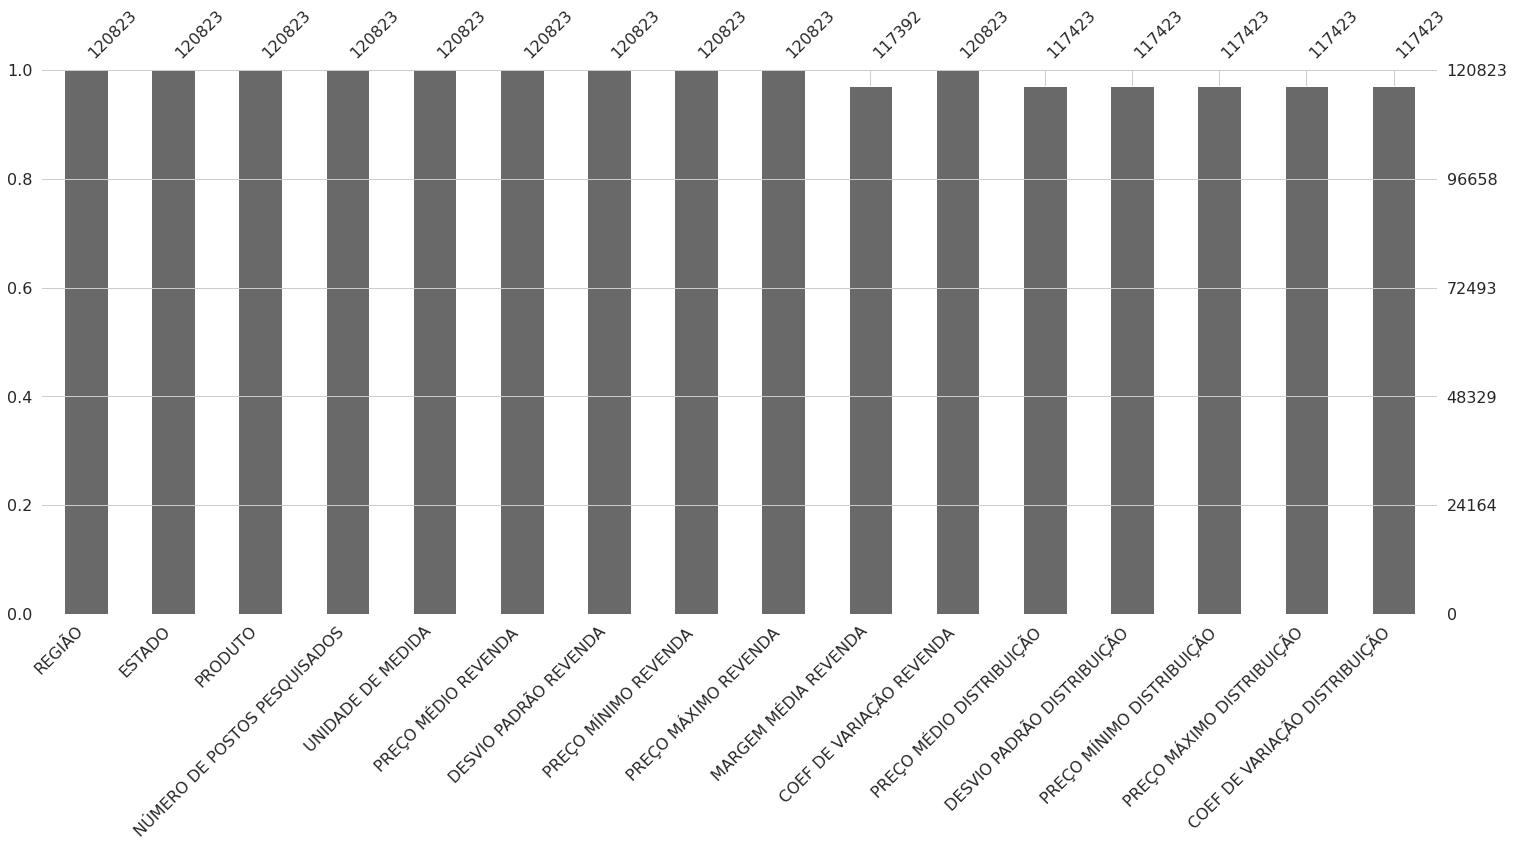

In [28]:
# Investigando dados faltantes
import missingno as msno
msno.bar((df))
plt.show()

In [50]:
df.isnull().mean()*100

REGIÃO                           0.000000
ESTADO                           0.000000
PRODUTO                          0.000000
NÚMERO DE POSTOS PESQUISADOS     0.000000
UNIDADE DE MEDIDA                0.000000
PREÇO MÉDIO REVENDA              0.000000
DESVIO PADRÃO REVENDA            0.000000
PREÇO MÍNIMO REVENDA             0.000000
PREÇO MÁXIMO REVENDA             0.000000
MARGEM MÉDIA REVENDA             2.839691
COEF DE VARIAÇÃO REVENDA         0.000000
PREÇO MÉDIO DISTRIBUIÇÃO         2.814034
DESVIO PADRÃO DISTRIBUIÇÃO       2.814034
PREÇO MÍNIMO DISTRIBUIÇÃO        2.814034
PREÇO MÁXIMO DISTRIBUIÇÃO        2.814034
COEF DE VARIAÇÃO DISTRIBUIÇÃO    2.814034
LOGPREÇO MÉDIO REVENDA           0.000000
dtype: float64

# Preenchendo dados faltantes com a mediana 

In [31]:
coef_mediana = df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'].median()
print(coef_mediana)

0.028999999999999998


In [32]:
df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'].fillna(coef_mediana, inplace=True)

In [34]:
preco_maximo_dist_mediana = df['PREÇO MÁXIMO DISTRIBUIÇÃO'].median()
df['PREÇO MÁXIMO DISTRIBUIÇÃO'].fillna(preco_maximo_dist_mediana, inplace=True)

In [35]:
preco_min_dist_mediana = df['PREÇO MÍNIMO DISTRIBUIÇÃO'].median()
df['PREÇO MÍNIMO DISTRIBUIÇÃO'].fillna(preco_min_dist_mediana, inplace=True)

In [37]:
desvio_padrao_dist_mediana = df['DESVIO PADRÃO DISTRIBUIÇÃO'].median()
df['DESVIO PADRÃO DISTRIBUIÇÃO'].fillna(desvio_padrao_dist_mediana, inplace=True)

In [38]:
preco_medio_dist_mediana = df['PREÇO MÉDIO DISTRIBUIÇÃO'].median()
df['PREÇO MÉDIO DISTRIBUIÇÃO'].fillna(preco_medio_dist_mediana, inplace=True)

In [39]:
margem_media_rev_mediana = df['MARGEM MÉDIA REVENDA'].median()
df['MARGEM MÉDIA REVENDA'].fillna(margem_media_rev_mediana, inplace=True)

In [33]:
df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'].isnull().sum()

0

In [40]:
df.isnull().sum()

REGIÃO                           0
ESTADO                           0
PRODUTO                          0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PREÇO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PREÇO MÍNIMO REVENDA             0
PREÇO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PREÇO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PREÇO MÍNIMO DISTRIBUIÇÃO        0
PREÇO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
dtype: int64

# EDA

In [43]:
# Variavel de interesse
target = 'PREÇO MÉDIO REVENDA'
print('target:', target)

# Variaveis numericas
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
num_vars.remove(target)
print(f'numerical vars({len(num_vars)}): {num_vars}')

# Variaveis categorical
cat_vars = df.select_dtypes(exclude=['int', 'float']).columns.tolist()
print(f'categorical vars({len(cat_vars)}): {cat_vars}')


target: PREÇO MÉDIO REVENDA
numerical vars(10): ['NÚMERO DE POSTOS PESQUISADOS', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA', 'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA', 'COEF DE VARIAÇÃO REVENDA', 'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO', 'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO']
categorical vars(5): ['REGIÃO', 'ESTADO', 'PRODUTO', 'UNIDADE DE MEDIDA', 'PREÇO MÉDIO DISTRIBUIÇÃO']


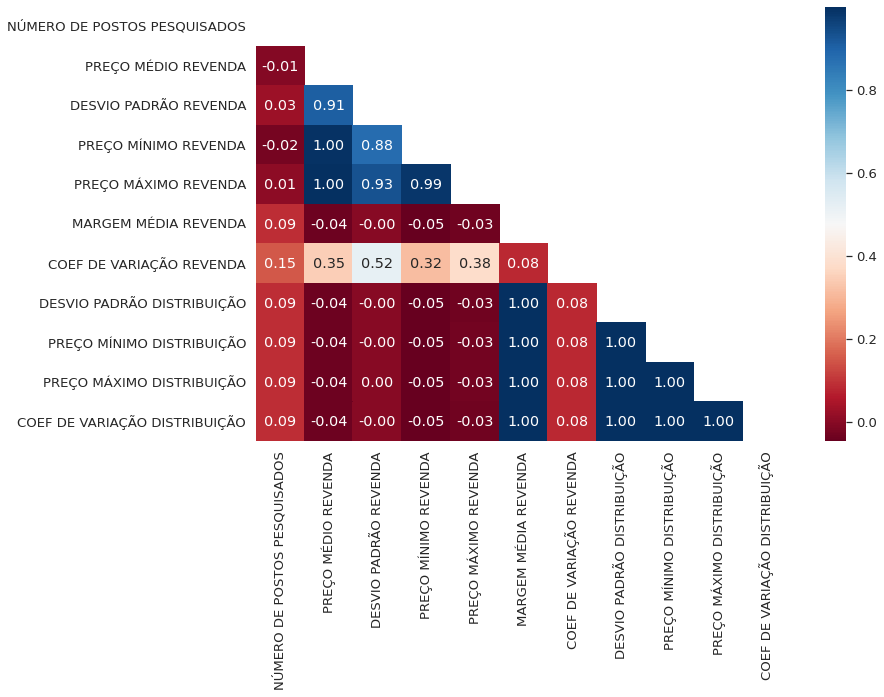

In [41]:
# Matriz de correlação
sns.set_context(font_scale = 5.0)
plt.figure(figsize = (12,8))
sns.heatmap(
    df.corr(), #Fonte dos dados, nossa matriz de correlação.
    annot = True, #Anotar os valores das correlações nas caixinhas coloridas.
    fmt = ".2f", #Formato float de 2 dígitos, para arredondar os números.
    cmap = "RdBu", # Mapa de cores do vermelho (menor) para o azul (maior).
    mask = np.triu(np.ones_like(df.corr())) #Máscara para excluir a diagonal superior da matriz.
)

plt.show()

In [42]:
# Sumário estatístico
df.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
count,120823.00,120823.00,120823.00,120823.00,120823.00,120823.00,120823.00,120823.00,120823.00,120823.00,120823.00
mean,221.07,11.47,0.68,9.98,13.23,-4563.97,0.05,-4558.15,-4551.45,-4549.17,-4558.65
std,387.94,19.16,1.40,16.43,22.45,20875.42,0.02,20858.84,20860.31,20860.81,20858.73
min,1.00,0.77,0.00,0.59,1.00,-99999.00,0.00,-99999.00,-99999.00,-99999.00,-99999.00
25%,39.00,2.16,0.08,1.99,2.42,0.28,0.03,0.04,1.65,1.92,0.02
50%,99.00,2.90,0.12,2.69,3.20,0.38,0.04,0.08,2.24,2.54,0.03
75%,226.00,4.03,0.20,3.79,4.59,0.54,0.06,0.14,3.16,3.54,0.06
95%,843.00,58.05,3.98,48.00,69.00,13.22,0.09,3.35,34.90,47.00,0.12
99%,2360.00,78.07,6.41,69.99,91.00,19.88,0.12,5.84,50.00,69.42,0.19
max,4167.00,107.50,10.75,100.00,120.00,36.85,0.40,18.39,83.00,94.50,0.78


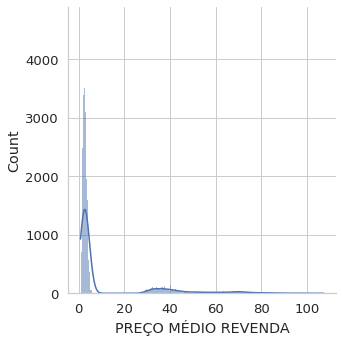

In [44]:
sns.displot(df, x="PREÇO MÉDIO REVENDA", kde=True)

In [45]:
df['LOGPREÇO MÉDIO REVENDA'] = np.log(df['PREÇO MÉDIO REVENDA'].values)


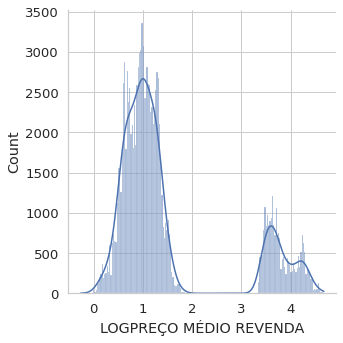

In [46]:
sns.displot(df, x="LOGPREÇO MÉDIO REVENDA", kde=True)

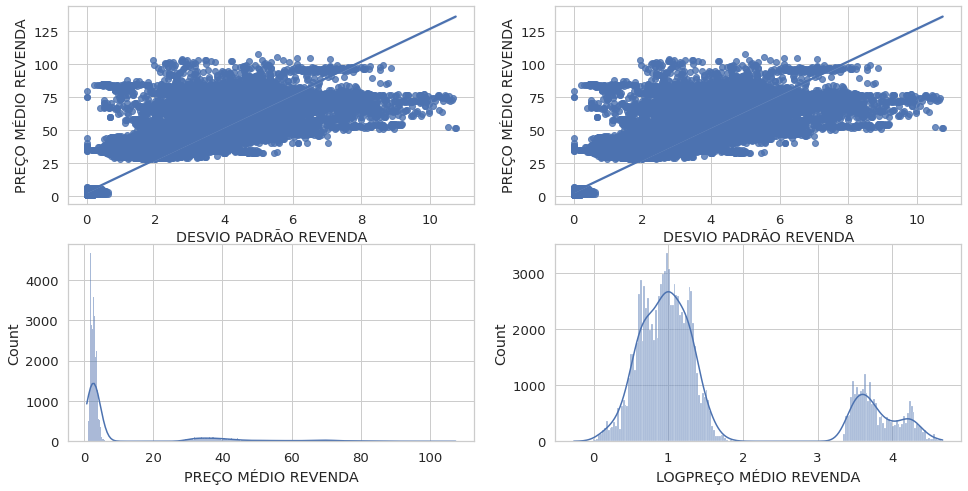

In [47]:
fig, axs = plt.subplots(figsize=(16,8), ncols=2, nrows=2)

sns.histplot(x=df['PREÇO MÉDIO REVENDA'], kde=True, ax=axs[1][0])
sns.histplot(x=df['LOGPREÇO MÉDIO REVENDA'], kde=True, ax=axs[1][1])

sns.regplot(x='DESVIO PADRÃO REVENDA', y='PREÇO MÉDIO REVENDA', data=df, ax=axs[0][0])
sns.regplot(x='DESVIO PADRÃO REVENDA', y='PREÇO MÉDIO REVENDA', data=df, ax=axs[0][1])

plt.show()

In [48]:
print('Cardinalidade médias das categóricas:', np.mean(df[cat_vars].nunique()))
df[cat_vars].nunique().sort_values(ascending=False)

Cardinalidade médias das categóricas: 3442.8


PREÇO MÉDIO DISTRIBUIÇÃO    17170
ESTADO                         27
PRODUTO                         9
REGIÃO                          5
UNIDADE DE MEDIDA               3
dtype: int64

In [49]:
def calc_vif(df):
  """ 
    Variable Inflation Factors
    VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.
    Reference: https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/#:~:text=Fixing%20Multicollinearity-,What%20is%20Multicollinearity%3F,variable%20in%20a%20regression%20model.
  """
  # Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = df.columns
  vif["VIF"] = [(df.values, i) for i in range(df.shape[1])]

  return(vif)

#Função para plotar o VIF
def plot_vif(vif):
  print('vars: ', list(vif.columns))
  print('Variable Inflation Factors:', vif.VIF.sum(), '\n')


In [50]:
lr_vars = ['DESVIO PADRÃO REVENDA', 'DESVIO PADRÃO REVENDA']
plot_vif(calc_vif(df[lr_vars]))


vars:  ['variables', 'VIF']
Variable Inflation Factors: (array([[0.016, 0.016],
       [0.114, 0.114],
       [0.097, 0.097],
       ...,
       [0.216, 0.216],
       [0.205, 0.205],
       [0.156, 0.156]]), 0, array([[0.016, 0.016],
       [0.114, 0.114],
       [0.097, 0.097],
       ...,
       [0.216, 0.216],
       [0.205, 0.205],
       [0.156, 0.156]]), 1) 



In [55]:
# Calculando o VIF das melhores features
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['LOGPREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA','PREÇO MÁXIMO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO REVENDA']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                     feature           VIF
0     LOGPREÇO MÉDIO REVENDA  5.318491e+00
1      DESVIO PADRÃO REVENDA  4.853215e+00
2  PREÇO MÁXIMO DISTRIBUIÇÃO  4.808360e+07
3  PREÇO MÍNIMO DISTRIBUIÇÃO  4.808626e+07
4   COEF DE VARIAÇÃO REVENDA  2.649273e+00


In [56]:
def train_test_valid_split(
    df: pd.DataFrame,
    features: list,
    target: str,
    test_size: float,
    valid_size: float,
    random_state: int,
) -> Tuple[np.array, np.array, np.array, np.array, np.array, np.array]:
    """Splits dataframe in training, testing and validation sets"""

    # The first train/test split
    (X_train, X_test, y_train, y_test) = train_test_split(
        df[features],
        df[target],
        test_size=test_size,
        random_state=random_state,
    )

    # The second train/test split
    (X_test, X_val, y_test, y_val) = train_test_split(
        X_test, y_test, test_size=valid_size, random_state=random_state
    )

    return X_train, X_test, X_val, y_train, y_test, y_val

# Função de métricas
def metrics_report(y, y_pred, dataset_name='valid'):
  mean_y = np.mean(y)
  mean_pred = np.mean(y_pred)

  rmse = round(math.sqrt(mean_squared_error(y, y_pred)), 2)
  mae = mean_absolute_error(y, y_pred)
  r2 = r2_score(y, y_pred)
  mape = mean_absolute_percentage_error(y, y_pred)
  
  report = pd.DataFrame({
    'metric': ['RMSE', 'MAE', 'R^2', 'MAPE', 'Avg. target', 'Avg. Prediction'],
    dataset_name: [rmse, mae, r2, mape, mean_y, mean_pred]
  })

  report[dataset_name] = report[dataset_name].round(2)
  return report